In [33]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from warnings import filterwarnings

filterwarnings('ignore')


In [34]:
df = pd.read_csv('./train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId - A unique ID for each passenger.
- Survived - Whether the passenger survived or not. (0 = No, 1 = Yes)
- Pclass - The class of the ticket the passenger purchased. (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)
- Name - The name of the passenger.
- Sex - Whether the passenger was Male or Female.
- Age - Age of the passenger in years.
- Sibsp - The number of siblings or spouses the passenger had aboard the Titanic.
- Parch - The number of parents or children the passenger had aboard the Titanic.
- Ticket - The ticket number of the passenger.
- Fare - The amount of money the passenger paid for the ticket.
- Cabin - The cabin number of the passenger according to the each deck.
- Embarked - The port from where the passenger were boarded the Titanic. (C = Cherbourg, Q = Queenstown, S = Southampton)-

In [35]:
df.shape

(891, 12)

The dataset has 891 observations and 12 columns

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
target = df['Survived']

In [40]:
features = ['PassengerId',  'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Since the '_Name_' column contains distinct names, we remove this column to prevent our model from overfitting

In [41]:
X = df[features].copy()

In [42]:
# X.drop(['Name'], axis=1, inplace=True)

Next, we check for missing values

In [43]:
X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 3 columns with missing values. '_Age,_' '_Cabin_' and '_Embarked_'.

In [44]:
percentage_of_age_missing = (X['Age'].isna().sum()/X.shape[0])*100
percentage_of_age_missing

19.865319865319865

We can see that 19.86% of the data in the age column is missing.

In [45]:
percentage_of_cabin_missing = (X['Cabin'].isna().sum()/X.shape[0])*100
percentage_of_cabin_missing

77.10437710437711

The '_Cabin_' column has almost 80% of its data missing. It implies this feature has less information and should not be used in building the model.

In [46]:
percentage_of_embarked_missing = (X['Embarked'].isna().sum()/X.shape[0])*100
percentage_of_embarked_missing

0.22446689113355783

The embarked column has only 0.22% of it's data missing. Since this feature represents the port from which the passenger boarded the titanic, it would make sense to impute it with the most frequent occuring port

### IMPUTING MISSING VALUES

In [47]:
imputer1 = SimpleImputer(strategy='mean')
imputer1.fit(pd.DataFrame(X['Age']))
X['Age'] = imputer1.transform(pd.DataFrame(X['Age']))

In [48]:
X['Age'].isna().sum()

0

In [49]:
mode_embark = X['Embarked'].mode()[0]
X['Embarked'] = X['Embarked'].fillna(mode_embark)

In [50]:
X['Embarked'].isna().sum()

0

Dropping the '_Cabin_' feature since it contains less info.

In [51]:
X.drop(['Cabin'], axis=1, inplace=True)

Dropping the '_PassengerId_' feature since it could lead to the model overfiting.

In [52]:
X.drop(['PassengerId'], axis=1, inplace=True)

<Axes: >

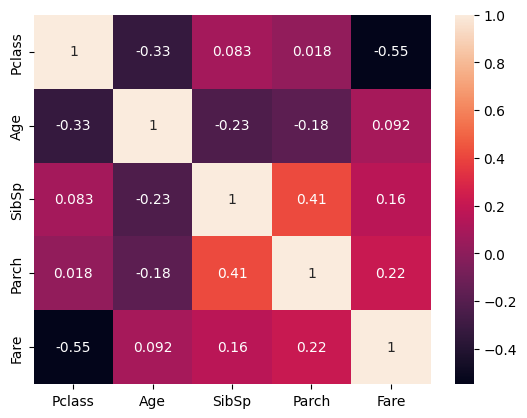

In [53]:
sns.heatmap(X.corr(numeric_only=True), annot=True)

### NUMERICAL FEATURES SCALING

In [54]:
numerical_feats = X.select_dtypes(np.number).columns.to_list()
numerical_feats

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [55]:
scaler = MinMaxScaler().fit(X[numerical_feats])
X[numerical_feats] = scaler.transform(X[numerical_feats])

In [56]:
X[numerical_feats]

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374
887,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.367921,0.125,0.333333,0.045771
889,0.0,0.321438,0.000,0.000000,0.058556


In [57]:
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

### CATEGORICAL ENCODING

In [58]:
categorical_feats = X.select_dtypes('object').columns.tolist()

encoder = LabelEncoder()

X['Sex'] = encoder.fit_transform(X['Sex'])
X['Ticket'] = encoder.fit_transform(X['Ticket'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])
X['Name'] = encoder.fit_transform(X['Name'])

In [59]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,108,1,0.271174,0.125,0.000000,523,0.014151,2
1,0.0,190,0,0.472229,0.125,0.000000,596,0.139136,0
2,1.0,353,0,0.321438,0.000,0.000000,669,0.015469,2
3,0.0,272,0,0.434531,0.125,0.000000,49,0.103644,2
4,1.0,15,1,0.434531,0.000,0.000000,472,0.015713,2
...,...,...,...,...,...,...,...,...,...
886,0.5,548,1,0.334004,0.000,0.000000,101,0.025374,2
887,0.0,303,0,0.233476,0.000,0.000000,14,0.058556,2
888,1.0,413,0,0.367921,0.125,0.333333,675,0.045771,2
889,0.0,81,1,0.321438,0.000,0.000000,8,0.058556,0


# MODEL BUILDING

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=44)

In [61]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [62]:
model1.coef_.tolist()

[[-1.715511999048721,
  -0.00037369555829105857,
  -2.5796295286669926,
  0.25165740176992085,
  -0.09266079141666074,
  0.25598080364047765,
  -0.00092651729067908,
  0.6939845005027229,
  -0.12224061063770733]]

In [63]:
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [64]:
weights_df = pd.DataFrame({
    'features': ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
    'weights': model1.coef_[0].tolist()
})
weights_df

,features,weights
0,Pclass,-1.715512
1,Name,-0.000374
2,Sex,-2.579630
3,Age,0.251657
4,SibSp,-0.092661
5,Parch,0.255981
6,Ticket,-0.000927
7,Fare,0.693985
8,Embarked,-0.122241


In [65]:
predictions = model1.predict(X_test)

In [66]:
y_test

117    0
143    0
748    0
796    1
853    1
      ..
583    0
530    1
118    0
395    0
299    1
Name: Survived, Length: 179, dtype: int64

In [67]:
model1.classes_

array([0, 1], dtype=int64)

In [68]:
model1.predict_proba(X_test)

array([[0.77503831, 0.22496169],
       [0.89121636, 0.10878364],
       [0.55798211, 0.44201789],
       [0.08421314, 0.91578686],
       [0.13383972, 0.86616028],
       [0.90842344, 0.09157656],
       [0.80291457, 0.19708543],
       [0.44050289, 0.55949711],
       [0.91139536, 0.08860464],
       [0.64010203, 0.35989797],
       [0.74510622, 0.25489378],
       [0.75769224, 0.24230776],
       [0.32728877, 0.67271123],
       [0.50086025, 0.49913975],
       [0.86648625, 0.13351375],
       [0.64654445, 0.35345555],
       [0.56069494, 0.43930506],
       [0.415124  , 0.584876  ],
       [0.23282316, 0.76717684],
       [0.86298891, 0.13701109],
       [0.89044227, 0.10955773],
       [0.82960239, 0.17039761],
       [0.08083615, 0.91916385],
       [0.58813012, 0.41186988],
       [0.5167505 , 0.4832495 ],
       [0.53912354, 0.46087646],
       [0.51413422, 0.48586578],
       [0.74505275, 0.25494725],
       [0.07099271, 0.92900729],
       [0.48564917, 0.51435083],
       [0.

Prediction accuracy on training set

In [71]:
accuracy_score(y_train, model1.predict(X_train))

0.8047752808988764

Prediction accuracy on test set

In [72]:
accuracy_score(y_test, predictions)

0.7430167597765364

The model has an accuracy of 74.30%